
Created on Wed Nov 6 2024

@author: Giuseppe Sinatra

# Data analysis of the pendulum using ML.
The data analysis will be conducted assuming that the physical law for the period of the **simple pendulum** is unknown.

After completing the entire analysis, the results will be compared with the well-known law.


## 1. Reading the dataset and saving it in a dataframe.

In [1]:
import pandas as pd

df = pd.read_csv('dataset_pendulum.csv') 
df.head()

,Period (s),Length (m),Mass (kg),Angle (deg)
0,1.716,0.8,0.2668,10
1,1.676,0.8,0.2668,10
2,1.673,0.8,0.2668,10
3,1.695,0.8,0.2668,10
4,1.733,0.8,0.2668,10


## 2. Understand the shape of the data

In [2]:
print(df.shape)
df.isnull().sum()

(1584, 4)


Period (s)     0
Length (m)     0
Mass (kg)      0
Angle (deg)    0
dtype: int64

Our dataset has 1,584 entries, 3 features (length, mass and angle) and a target (period). 

We can notice that all the physical quantities are expressed using the SI except for the angle which I am going to convert to radiants for the analysis. Keeping it expressed also in degrees is useful to filter the data.

In [3]:
import math
df['Angle (rad)']=df['Angle (deg)']*math.pi/180

### 2.A Exploratory data analysis (EDA)
Building a histogram for each feature, a scatter plot period-feature and a correlation matrix

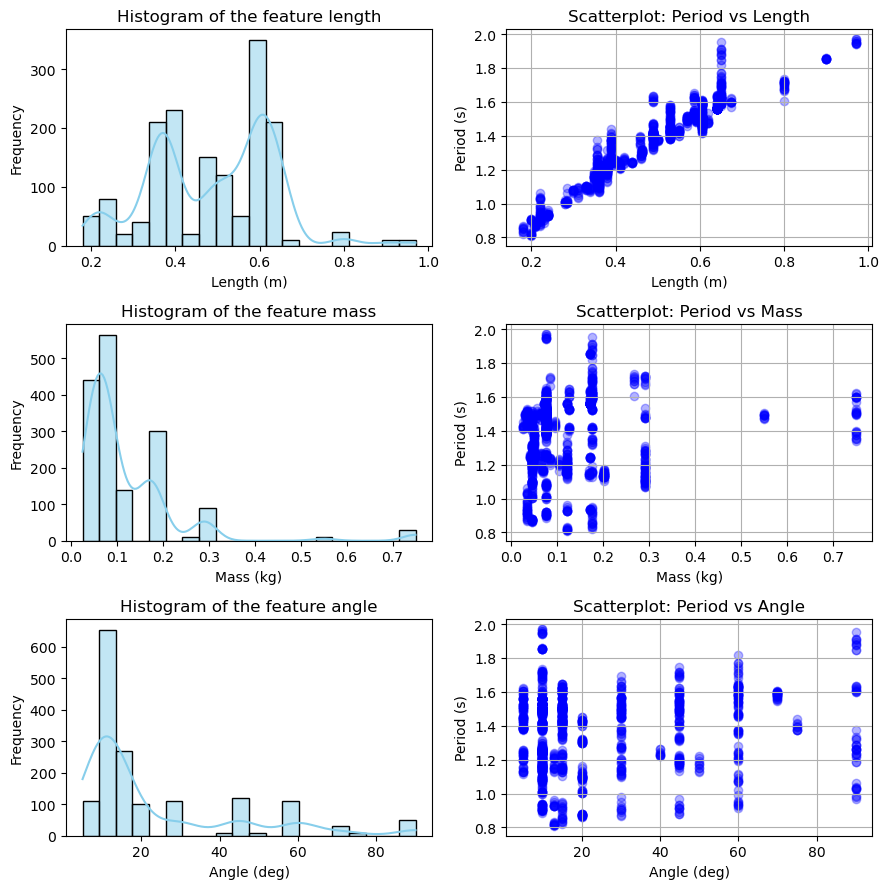

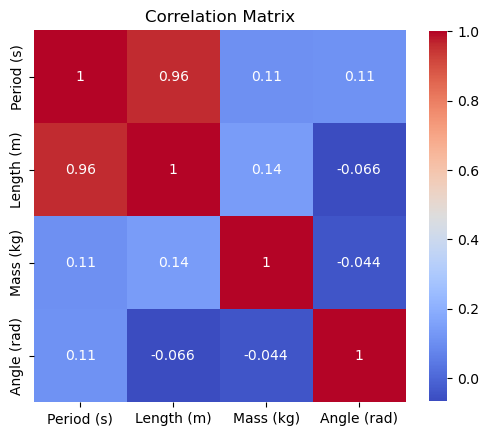

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(9, 9))

sns.histplot(df['Length (m)'], bins=20, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_xlabel('Length (m)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Histogram of the feature length')

axes[0,1].scatter(df['Length (m)'], df['Period (s)'], color='b', alpha=0.3)
axes[0,1].set_xlabel('Length (m)')
axes[0,1].set_ylabel('Period (s)')
axes[0,1].set_title('Scatterplot: Period vs Length')
axes[0,1].grid(True)


sns.histplot(df['Mass (kg)'], bins=20, kde=True, color='skyblue', ax=axes[1,0])
axes[1,0].set_xlabel('Mass (kg)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Histogram of the feature mass')

axes[1,1].scatter(df['Mass (kg)'], df['Period (s)'], color='b', alpha=0.3)
axes[1,1].set_xlabel('Mass (kg)')
axes[1,1].set_ylabel('Period (s)')
axes[1,1].set_title('Scatterplot: Period vs Mass')
axes[1,1].grid(True)


sns.histplot(df['Angle (deg)'], bins=20, kde=True, color='skyblue', ax=axes[2,0])
axes[2,0].set_xlabel('Angle (deg)')
axes[2,0].set_ylabel('Frequency')
axes[2,0].set_title('Histogram of the feature angle')

axes[2,1].scatter(df['Angle (deg)'], df['Period (s)'], color='b', alpha=0.3)
axes[2,1].set_xlabel('Angle (deg)')
axes[2,1].set_ylabel('Period (s)')
axes[2,1].set_title('Scatterplot: Period vs Angle')
axes[2,1].grid(True)

plt.tight_layout()
plt.show()

# Evaluation Correlation Matrix
correlation_matrix = df[['Period (s)', 'Length (m)', 'Mass (kg)', 'Angle (rad)']].corr()

# Visualizzation of the correlation matrix with a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

Looking at the graphs of the first group and at the correlation matrix, we can notice that **length** has the highest correlation to **period** while mass and angle can be neglected in the first analysis. 

Secondly, in the period-length scatterplot we see that there are some **outliers** with length values that are too small for their period. This is probably the result of some errors during data collection.

Thirdly, I think that the strong correlation between period and length could hide the eventual correlation with the other two features, therefore I am going to redo the **scatterplots with a filter to maintain an almost constant length**.

## 3. Data Cleaning and Data Exploration

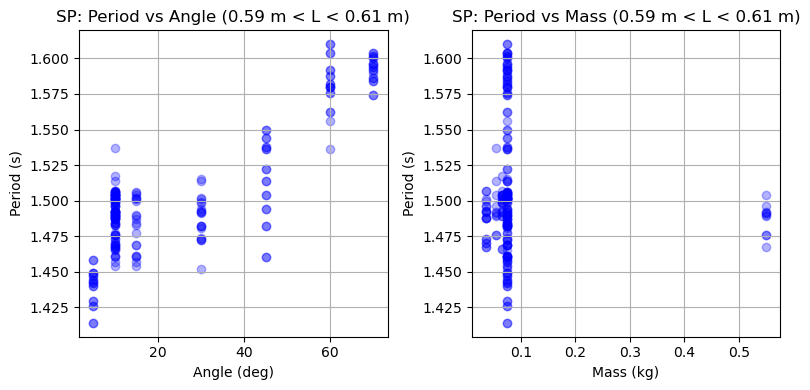

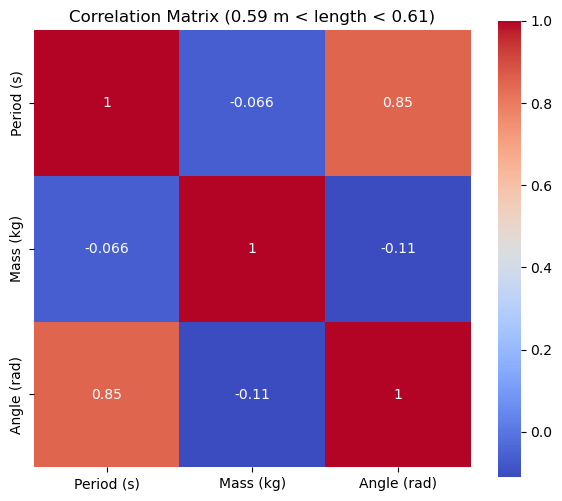

In [5]:
#I have chosen the bin with the most value of length
# Filter to select length around 0.60 m with a fix tollerance
tollerance = 0.01
mean_value = 0.6 

length_filtered_df = df[(df['Length (m)'] > mean_value - tollerance) & (df['Length (m)'] < mean_value + tollerance)]

#Scatterplot and correlation matrix for angle and mass with the periodo under a condition of a length roughly constant
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(length_filtered_df['Angle (deg)'], length_filtered_df['Period (s)'], color='b', alpha=0.3)
axes[0].set_xlabel('Angle (deg)')
axes[0].set_ylabel('Period (s)')
axes[0].set_title(f'SP: Period vs Angle ({mean_value-tollerance:.2f} m < L < {mean_value+tollerance} m)')
axes[0].grid(True)

axes[1].scatter(length_filtered_df['Mass (kg)'], length_filtered_df['Period (s)'], color='b', alpha=0.3)
axes[1].set_xlabel('Mass (kg)')
axes[1].set_ylabel('Period (s)')
axes[1].set_title(f'SP: Period vs Mass ({mean_value-tollerance:.2f} m < L < {mean_value+tollerance} m)')
axes[1].grid(True)
plt.tight_layout()

plt.savefig('sp_with_constant_length.jpg')
plt.show()

# Evaluation Correlation Matrix
correlation_matrix = length_filtered_df[['Period (s)', 'Mass (kg)', 'Angle (rad)']].corr()

# Visualizzation of the correlation matrix with a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title(f"Correlation Matrix ({mean_value-tollerance:.2f} m < length < {mean_value+tollerance})")
plt.tight_layout()
plt.show()

Our suspicions were correct. We found a correlation with angle but we confirm a lack of correlation with mass. At this point we decide to neglect the mass feature.

We perform a first analysis for small angles (smaller than 20°) where the correlation with period seems insignificant.

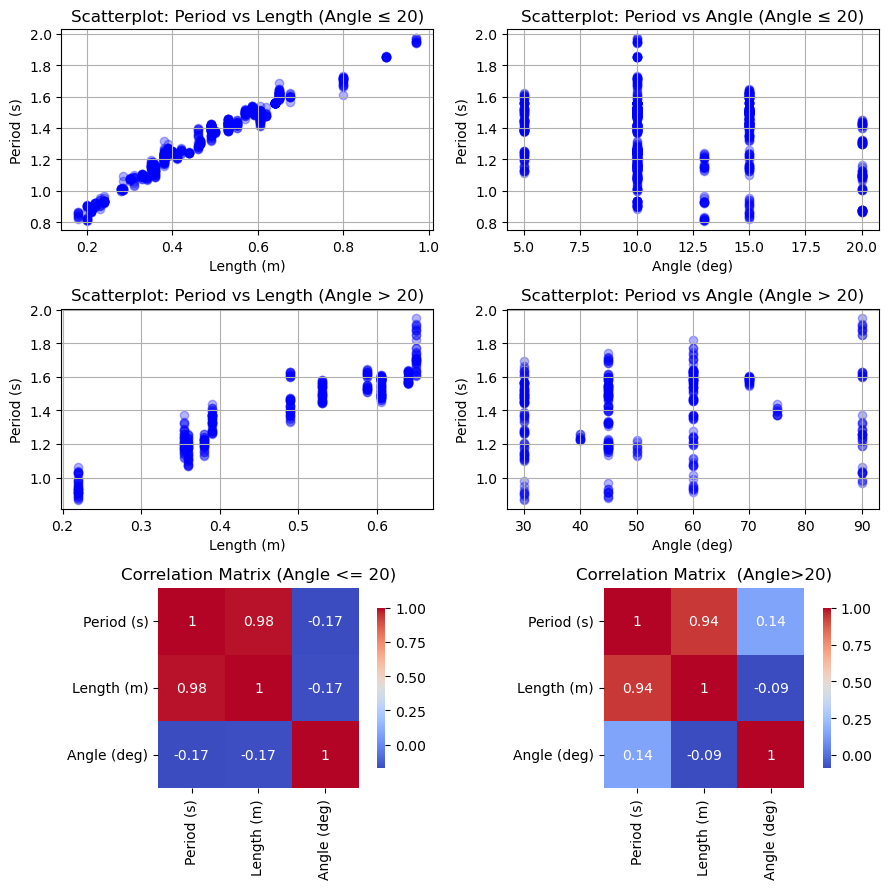

In [6]:
# Filter to select only the entries with Angle <= 20°
filtered_df = df[df['Angle (deg)'] <= 20]


fig, axes = plt.subplots(3, 2, figsize=(9, 9))
axes[0,0].scatter(filtered_df['Length (m)'], filtered_df['Period (s)'], color='b', alpha=0.3)
axes[0,0].set_xlabel('Length (m)')
axes[0,0].set_ylabel('Period (s)')
axes[0,0].set_title('Scatterplot: Period vs Length (Angle ≤ 20)')
axes[0,0].grid(True)

axes[0,1].scatter(filtered_df['Angle (deg)'], filtered_df['Period (s)'], color='b', alpha=0.3)
axes[0,1].set_xlabel('Angle (deg)')
axes[0,1].set_ylabel('Period (s)')
axes[0,1].set_title('Scatterplot: Period vs Angle (Angle ≤ 20)')
axes[0,1].grid(True)

# Filter to select only the entries with Angle > 20°
opposite_df = df[~(df['Angle (deg)'] <= 20)]

axes[1,0].scatter(opposite_df['Length (m)'], opposite_df['Period (s)'], color='b', alpha=0.3)
axes[1,0].set_xlabel('Length (m)')
axes[1,0].set_ylabel('Period (s)')
axes[1,0].set_title('Scatterplot: Period vs Length (Angle > 20)')
axes[1,0].grid(True)

axes[1,1].scatter(opposite_df['Angle (deg)'], opposite_df['Period (s)'], color='b', alpha=0.3)
axes[1,1].set_xlabel('Angle (deg)')
axes[1,1].set_ylabel('Period (s)')
axes[1,1].set_title('Scatterplot: Period vs Angle (Angle > 20)')
axes[1,1].grid(True)

correlation_matrix_1 = filtered_df[['Period (s)', 'Length (m)', 'Angle (deg)']].corr()
correlation_matrix_2 = opposite_df[['Period (s)', 'Length (m)', 'Angle (deg)']].corr()

sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[2,0])
axes[2,0].set_title("Correlation Matrix (Angle <= 20)")
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[2,1])
axes[2,1].set_title("Correlation Matrix  (Angle>20)")
plt.tight_layout()
plt.savefig('plots_by_angles.jpg')
plt.show()

Looking at the correlation matrix, we can see that the correlation between **period and length is 0,98** for small angles and **0,94 for angles bigger than 20°**. In the first matrix the correlation was 0,96. 

We can also observe that the **outliers** presented in the first period-length scatterplot **disappeared**: another sign of a sligth correlation between angle and period.

## 4. Data Preprocessing for the Machine Learning Model

In physical laws, variables are often related through basic operations like division, multiplication, and exponentiation. Our objective is to avoid making any assumptions about the specific form of the pendulum’s governing law. Therefore, it seems reasonable to use logarithmic transformations: this way, multiplications and divisions convert into additions and subtractions, and exponents are absorbed as coefficients in a linear regression model.

In [7]:
import numpy as np
df['Log_Period']=np.log10(df['Period (s)'])
df['Log_Length']=np.log10(df['Length (m)'])
df['Log_Angle']=np.log10(df['Angle (rad)'])
df.head()

,Period (s),Length (m),Mass (kg),Angle (deg),Angle (rad),Log_Period,Log_Length,Log_Angle
0,1.716,0.8,0.2668,10,0.174533,0.234517,-0.09691,-0.758123
1,1.676,0.8,0.2668,10,0.174533,0.224274,-0.09691,-0.758123
2,1.673,0.8,0.2668,10,0.174533,0.223496,-0.09691,-0.758123
3,1.695,0.8,0.2668,10,0.174533,0.229170,-0.09691,-0.758123
4,1.733,0.8,0.2668,10,0.174533,0.238799,-0.09691,-0.758123


## 5. Model Building (Angle <= 20° and using just length)

Slope: 0.509 ± 0.002
Intercept: 0.292 ± 0.001


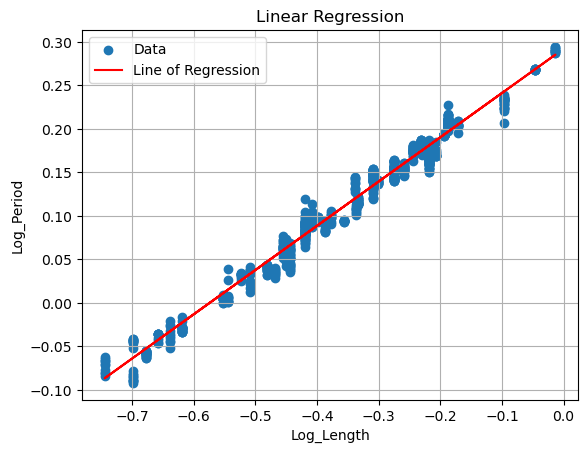

In [8]:
import statsmodels.api as sm
import numpy as np

filtered_df = df[df['Angle (deg)'] <= 20]
X = filtered_df['Log_Length'].values.reshape(-1, 1)
y = filtered_df['Log_Period'].values


# Add a constant for the errors
X = sm.add_constant(X)  # Add a column of 1 to evaluate the intercepts
model = sm.OLS(y, X)    # Creation of the Linear Regression Model 
results = model.fit()    # Results of the model

slope = results.params[1]
intercept = results.params[0]
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f"Slope: {slope:.3f} ± {slope_error:.3f}")
print(f"Intercept: {intercept:.3f} ± {intercept_error:.3f}")

X = filtered_df['Log_Length'].values.reshape(-1, 1)
y_regression = slope * X + intercept

plt.scatter(X, y, label='Data')
plt.plot(X, y_regression, color='red', label='Line of Regression')

plt.title('Linear Regression')
plt.xlabel('Log_Length')
plt.ylabel('Log_Period')
plt.legend()
plt.grid(True)
plt.savefig('LR_small_angles.jpg')
plt.show()


### 5.A Results for the small angles model
Now we need to do a bit of math. We have found this equation:

$$Log(T)=0.509Log(L)+0.292$$

We need to solve the equation for T. This way, we can compare it with the well-know pendulum law for small angles:

$$Log(T)=Log(L^{0.509})+0.292\cdot Log (10)$$
$$Log(T)=Log(L^{0.509})+Log (10^{0.292})$$
$$Log(T)=Log(10^{0.292}\cdot L^{0.509})$$
$$ T = 10^{0.292}\cdot L^{0.509} $$

We need to compare it with: $$T=2\pi\sqrt{\frac{L}{g}}=\frac{2\pi}{\sqrt{g}}\sqrt{L}$$
The result is 0.509 instead of 0.5 with a relative error of 1.8%. For the other parameter, we can compare the prediction for g in our model with $$9.8\ m/s^2$$ of the theoretical model:
$$g_{model}= \frac{4\pi^2}{(10^{0.292})^2}=10.29\ m/s^2$$ with a relative error of 5%.


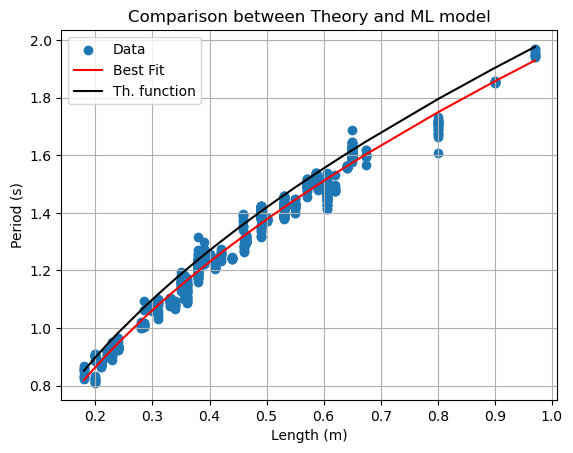

In [9]:
Sorted_filtered_df = filtered_df.sort_values(by='Length (m)', ascending=True)

X = Sorted_filtered_df['Length (m)'].values.reshape(-1, 1)
y = Sorted_filtered_df['Period (s)']
y_fit = 10**intercept*(Sorted_filtered_df['Length (m)'])**slope
y_teo = 2*math.pi*(Sorted_filtered_df['Length (m)']/9.8)**0.5

plt.scatter(X, y, label='Data')
plt.plot(X, y_fit, color='red', label='Best Fit')
plt.plot(X, y_teo, color='black', label='Th. function')

plt.title('Comparison between Theory and ML model')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')
plt.legend()
plt.grid(True)
plt.savefig('Comparison_plot_small_angles.jpg')
plt.show()

### 5.B Metrics

We want to evaluate the average error between our model and the theoretical prediction, therefore we will use the standard deviation. 

In [10]:
df['Teor_pred_sm (T)']=2*math.pi*(df['Length (m)']/9.8)**0.5
df['ML_pred_sm (T)']=10**intercept*(df['Length (m)'])**slope
filtered_df = df[df['Angle (deg)'] <= 20]

quadratic_error_DT = (filtered_df['Teor_pred_sm (T)']-filtered_df['Period (s)'])**2
quadratic_error_TML = (filtered_df['Teor_pred_sm (T)']-filtered_df['ML_pred_sm (T)'])**2
quadratic_error_DML = (filtered_df['Period (s)']-filtered_df['ML_pred_sm (T)'])**2

st_dev_DT=quadratic_error_DT.mean()**0.5
st_dev_TML=quadratic_error_TML.mean()**0.5
st_dev_DML=quadratic_error_DML.mean()**0.5

results = [f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}\n',
           f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}\n',
            f'Standard Deviation between ML model and data: {st_dev_DML:.3f}']

print(f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}')
print(f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}')
print(f'Standard Deviation between ML model and data: {st_dev_DML:.3f}')

with open('results_sa.txt', 'w') as file:
        file.writelines(results)

Standard Deviation between data and theoretical prediction: 0.053
Standard Deviation between ML model and theoretical prediction: 0.041
Standard Deviation between ML model and data: 0.033


### 5.C Saving coefficients in a CSV file 

In [11]:
import csv

with open('coefficients_sa.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Intercept', 'Slope'])
    writer.writerow([intercept, slope])


## 6. Model Building(Angle <= 20° but using also angle)

In [12]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

X = filtered_df[['Log_Length','Log_Angle']]
y = filtered_df['Log_Period'].values

slr.fit(X, y)
y_pred = slr.predict(X)

par1 = slr.coef_[0]
par2 = slr.coef_[1]

intercept1 = slr.intercept_

print(f"First Parameter (L): {par1:.3f}")
print(f"Second Parameter (A): {par2:.3f}")
print(f"Intercept: {intercept1:.3f}")

First Parameter (L): 0.509
Second Parameter (A): 0.001
Intercept: 0.293


### 6.A Results for small angles with all the features
From our results, we can confirm the indipendece of the Period from small angles, infact not only the coefficient connected with angle is very small but also the other two didn't change compare with the previous situation.

## 7. Model Building for all angles

In [13]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

X = df[['Log_Length','Log_Angle']]
y = df['Log_Period'].values

slr.fit(X, y)
y_pred = slr.predict(X)

par1_1 = slr.coef_[0]
par2_1 = slr.coef_[1]

intercept_1 = slr.intercept_

print('Results of the fit using length and angle')
print(f"First Parameter (L): {par1_1:.3f}")
print(f"Second Parameter (A): {par2_1:.3f}")
print(f"Intercept: {intercept_1:.3f}")

Results of the fit using length and angle
First Parameter (L): 0.516
Second Parameter (A): 0.031
Intercept: 0.316


### 7.A Results using all the features without any kind of selection

We can confirm that now there is a stronger correlation with the angle as can be expected from the theory. This is the equation that describes period for angles between 0° and 90°:

$$T=2\pi\sqrt{\frac{L}{g}}\bigg(1+\frac{\theta^2}{16}\bigg)$$

With our model, we obtain this kind of equation:

$$Log(T)=0.316+0.516Log(L)+0.031Log(\theta)$$
$$T=10^{0.316}\cdot L^{0.516}\cdot \theta^{0.031}$$

It is difficult to compare it with the theorethical equation because the structure of the equations is different. Therefore we can only compare their predictions for period.

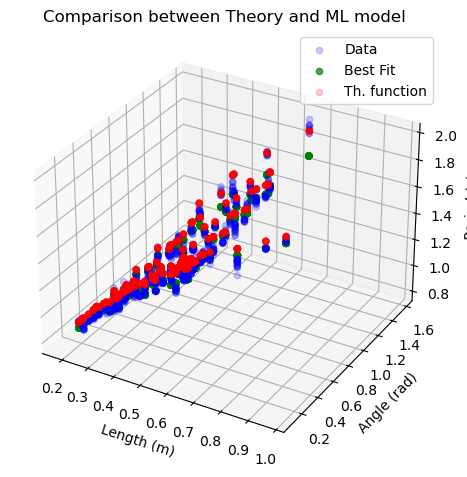

In [17]:
#3D graphs of our results
Sorted_df = df.sort_values(by='Length (m)', ascending=True)

X = Sorted_df['Length (m)'].values.reshape(-1, 1)
Y = Sorted_df['Angle (rad)'].values.reshape(-1, 1)
z = Sorted_df['Period (s)']
z_fit = (10**intercept_1)*(X**par1_1)*(Y**par2_1)
z_teo = 2*math.pi*(X/9.8)**0.5*(1+Y**2/16)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, z, color = 'blue', label='Data', alpha = 0.2)
ax.scatter(X, Y, z_fit, color='green', label='Best Fit', alpha = 0.7)
ax.scatter(X, Y, z_teo, color='red', label='Th. function', alpha = 0.2)


ax.set_title('Comparison between Theory and ML model')
ax.set_xlabel('Length (m)')
ax.set_ylabel('Angle (rad)')
ax.set_zlabel('Period (s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Comparison_3D_plot.jpg')
plt.show()

### 7.B Metrics

In [18]:
df['ML_pred (T)']=10**intercept_1*(df['Length (m)'])**par1_1*(df['Angle (rad)'])**par2_1
df['Teor_pred (T)']=2*math.pi*(df['Length (m)']/9.8)**0.5*(1+df['Angle (rad)']**2/16)

quadratic_error_DT = (df['Teor_pred (T)']-df['Period (s)'])**2
quadratic_error_TML = (df['Teor_pred (T)']-df['ML_pred (T)'])**2
quadratic_error_DML = (df['Period (s)']-df['ML_pred (T)'])**2

st_dev_DT=quadratic_error_DT.mean()**0.5
st_dev_TML=quadratic_error_TML.mean()**0.5
st_dev_DML=quadratic_error_DML.mean()**0.5

print(f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}')
print(f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}')
print(f'Standard Deviation between ML model and data: {st_dev_DML:.3f}')

results = [f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}\n',
           f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}\n',
            f'Standard Deviation between ML model and data: {st_dev_DML:.3f}']

with open('results.txt', 'w') as file:
        file.writelines(results)

Standard Deviation between data and theoretical prediction: 0.062
Standard Deviation between ML model and theoretical prediction: 0.055
Standard Deviation between ML model and data: 0.046


### 7.C Saving Coefficients in a CSV file

In [19]:
import csv

with open('coefficients.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Intercept', 'First Parameter(L)', 'Second Parameter (A)'])
    writer.writerow([intercept_1, par1_1, par2_1])
